## "US Housing Trends Analyzer and Influence Explorer"


#### **Build a data science models that explains how these factors impacted home prices over the last 20 years.**

#### Importing necessary libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Reading prepared (US home prices) data into a dataframe.


In [2]:
df = pd.read_csv("/kaggle/input/us-home-price-analysis/final_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Urban Population (% of Total Population),Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,,,
2000-01-01,100.552,2000,1,49335.000000,178204700.0,4.3,169.3,4.0,74.25278,144.1,5.45,79.057,104705.0,67470.0,19.69,12.31763
2000-02-01,101.339,2000,2,49593.000000,178284800.0,4.3,170.0,4.1,74.27563,144.7,5.73,79.057,104705.0,67470.0,19.69,12.31763
2000-03-01,102.126,2000,3,49851.000000,178367900.0,4.3,171.0,4.0,74.22861,145.4,5.85,79.057,104705.0,67470.0,19.69,12.31763
2000-04-01,102.922,2000,4,50109.000000,178536800.0,4.4,170.9,3.8,74.51271,145.6,6.02,79.057,104705.0,67470.0,19.69,12.31763
2000-05-01,103.678,2000,5,50080.666667,178770300.0,4.4,171.2,4.0,74.08559,144.9,6.27,79.057,104705.0,67470.0,19.69,12.31763


In [3]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)
df.head()

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Urban Population (% of Total Population),Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,
2000-01-01,100.552,49335.000000,178204700.0,4.3,169.3,4.0,74.25278,144.1,5.45,79.057,104705.0,67470.0,19.69,12.31763
2000-02-01,101.339,49593.000000,178284800.0,4.3,170.0,4.1,74.27563,144.7,5.73,79.057,104705.0,67470.0,19.69,12.31763
2000-03-01,102.126,49851.000000,178367900.0,4.3,171.0,4.0,74.22861,145.4,5.85,79.057,104705.0,67470.0,19.69,12.31763
2000-04-01,102.922,50109.000000,178536800.0,4.4,170.9,3.8,74.51271,145.6,6.02,79.057,104705.0,67470.0,19.69,12.31763
2000-05-01,103.678,50080.666667,178770300.0,4.4,171.2,4.0,74.08559,144.9,6.27,79.057,104705.0,67470.0,19.69,12.31763


### Exploratory Data Analysis (EDA)


### Summary Statistics:

Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [4]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Urban Population (% of Total Population),Num_Households,median_income,Subsidy,old_age_pop
count,276.000000,276.000000,2.760000e+02,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,171.879348,56430.847826,1.977135e+08,5.875725,223.024402,5.856522,69.960651,203.825188,1.644457,80.996696,119526.086957,68614.782609,32.956304,13.804242
std,44.726484,4459.177854,8.567284e+06,1.948004,31.390079,1.961649,2.284681,47.660065,1.867529,1.199551,7423.727359,4346.572688,7.188200,1.542809
min,100.552000,49335.000000,1.782047e+08,3.300000,169.300000,3.500000,60.194210,141.700000,0.050000,79.057000,104705.000000,63350.000000,19.690000,12.277934
25%,142.140750,53513.500000,1.916444e+08,4.300000,198.100000,4.400000,68.010962,171.300000,0.130000,79.928000,113343.000000,65760.000000,27.651000,12.360163
50%,165.857500,55470.000000,2.000755e+08,5.400000,225.100500,5.400000,70.652475,202.650000,1.010000,80.944000,119927.000000,66780.000000,33.213000,13.270203
75%,188.173500,59444.500000,2.053659e+08,6.700000,244.004500,6.700000,71.586687,220.025000,2.392500,82.058000,126224.000000,72090.000000,37.550000,15.066290
max,304.456000,65997.000000,2.075857e+08,12.200000,298.812000,14.800000,74.512710,353.015000,6.540000,83.084000,131202.000000,78250.000000,48.021000,17.128121


### Correlation Analysis:

Calculate the correlation matrix to measure the linear relationships between variables.

In [5]:
# Correlation matrix
corr_matrix = df.corr()

Visualize the correlation matrix using a heatmap to identify strong positive and negative correlations.

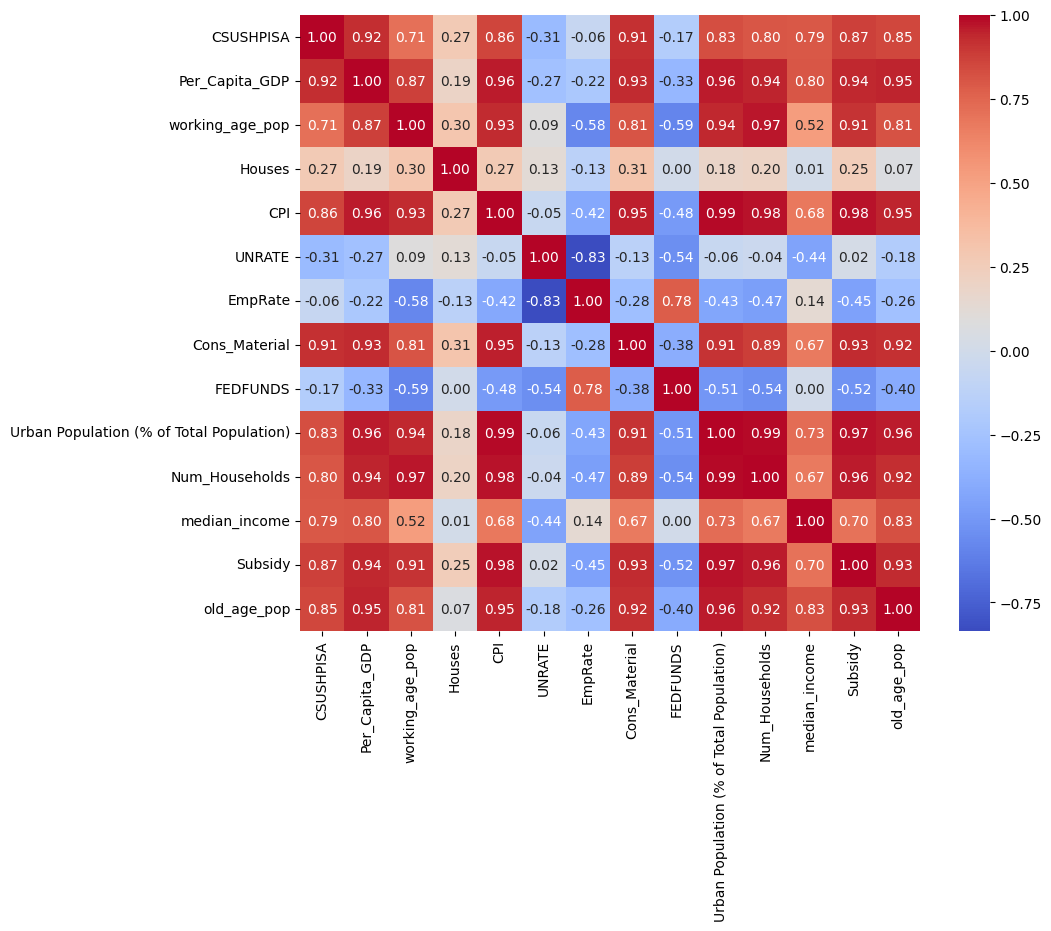

In [6]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Time Series Analysis:

For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.

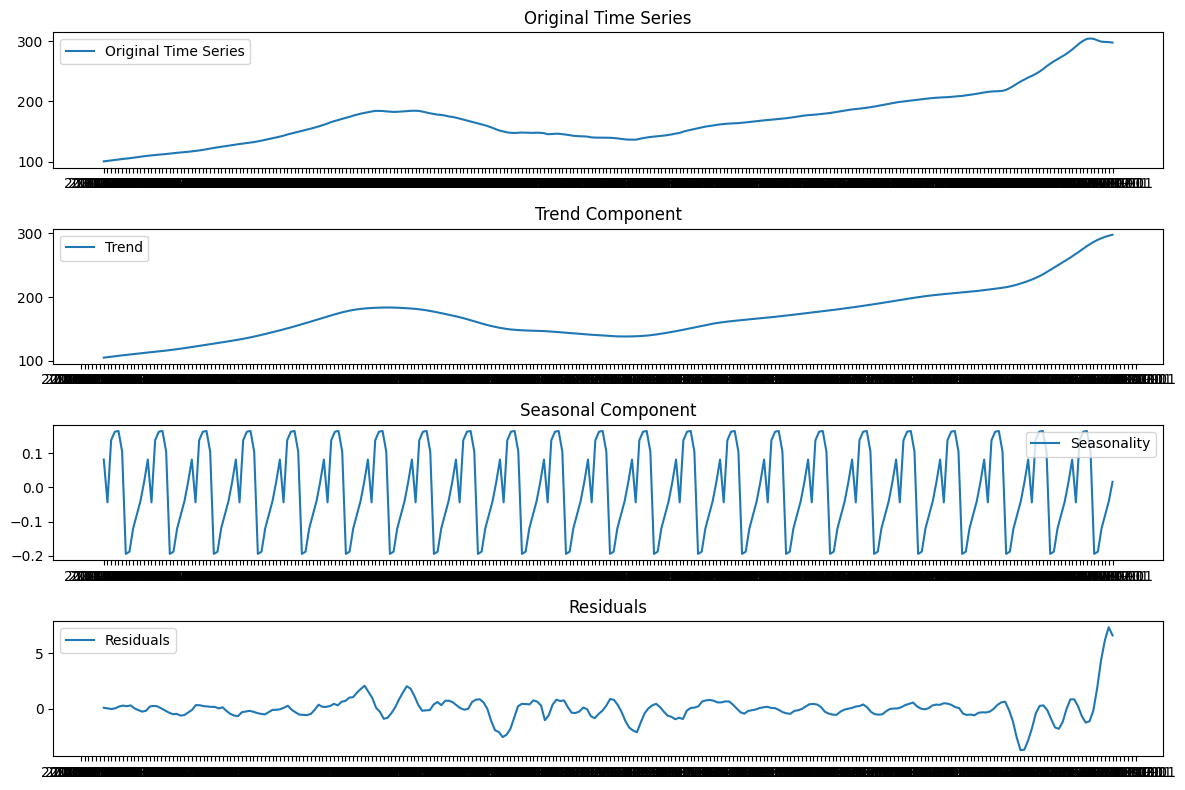

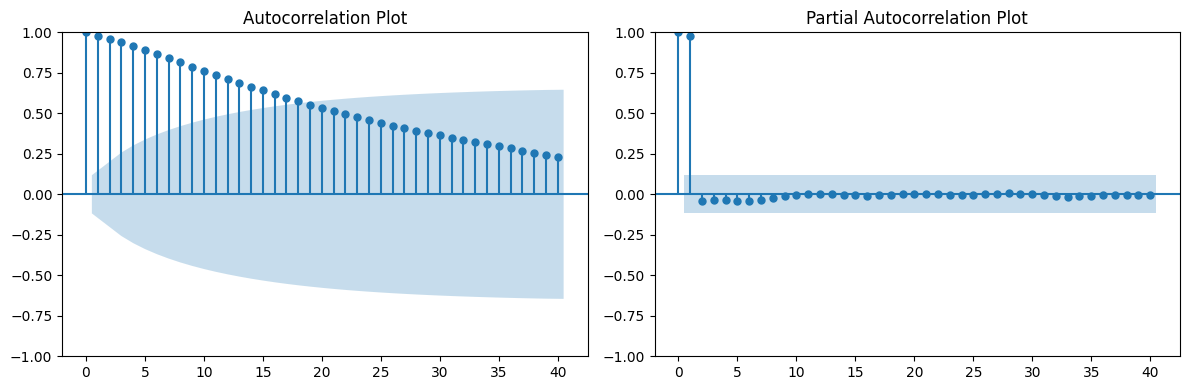

In [7]:
# Time Series Decomposition
decomposition = seasonal_decompose(df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()


* The trend component represents the overall trend in home prices.

* The seasonal component captures any recurring patterns or seasonality.

* The residual component accounts for the remaining variability in the data.

### Data Visualization:

Visualize the data using various plots and graphs to understand its distribution and trends.

**Pairplot for visualizing relationships**

In [8]:
df.head()

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Urban Population (% of Total Population),Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,
2000-01-01,100.552,49335.000000,178204700.0,4.3,169.3,4.0,74.25278,144.1,5.45,79.057,104705.0,67470.0,19.69,12.31763
2000-02-01,101.339,49593.000000,178284800.0,4.3,170.0,4.1,74.27563,144.7,5.73,79.057,104705.0,67470.0,19.69,12.31763
2000-03-01,102.126,49851.000000,178367900.0,4.3,171.0,4.0,74.22861,145.4,5.85,79.057,104705.0,67470.0,19.69,12.31763
2000-04-01,102.922,50109.000000,178536800.0,4.4,170.9,3.8,74.51271,145.6,6.02,79.057,104705.0,67470.0,19.69,12.31763
2000-05-01,103.678,50080.666667,178770300.0,4.4,171.2,4.0,74.08559,144.9,6.27,79.057,104705.0,67470.0,19.69,12.31763


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

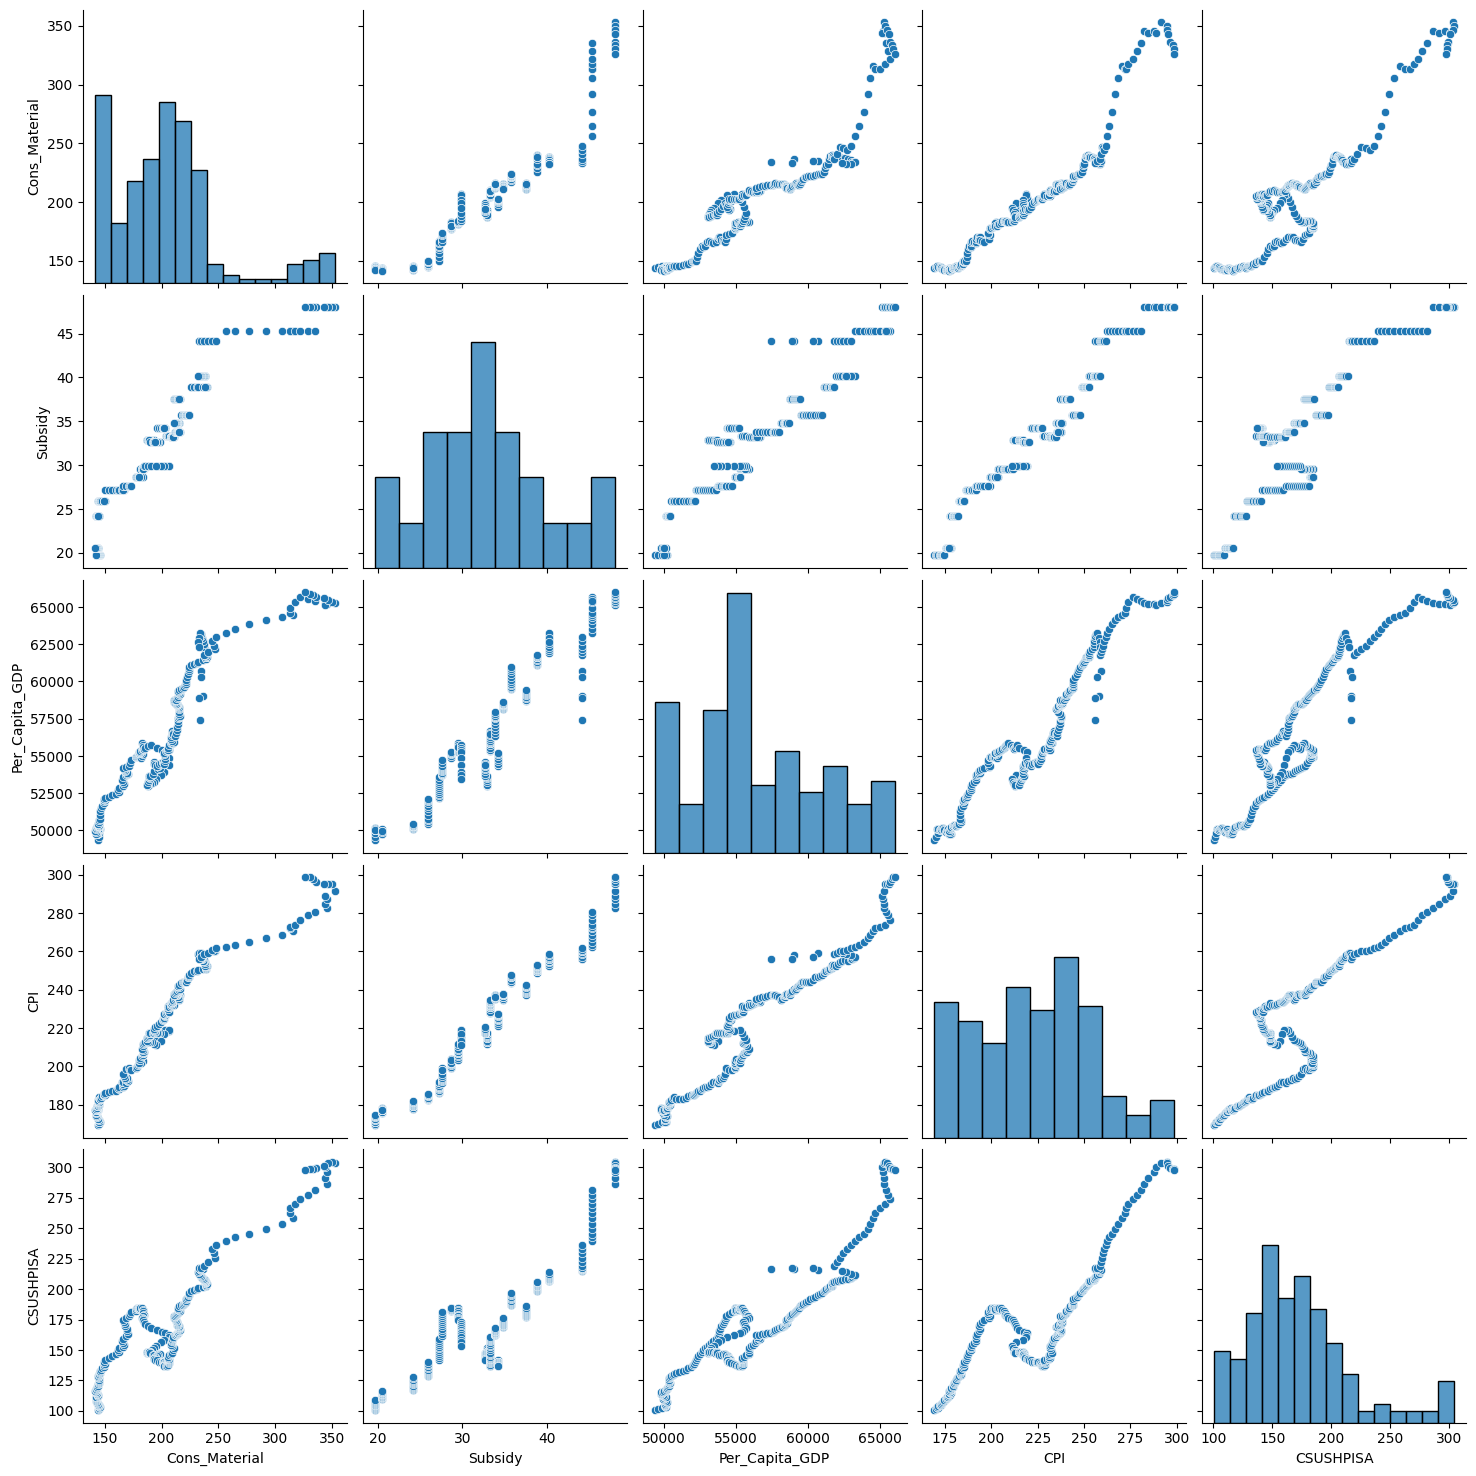

In [9]:
#pairplot
selected_columns = ['Cons_Material', 'Subsidy', 'Per_Capita_GDP', 'CPI', 'CSUSHPISA']
sns.pairplot(df[selected_columns], height=3)
plt.show()

**Histograms and Kernel Density Plots**

<Figure size 2000x1500 with 0 Axes>

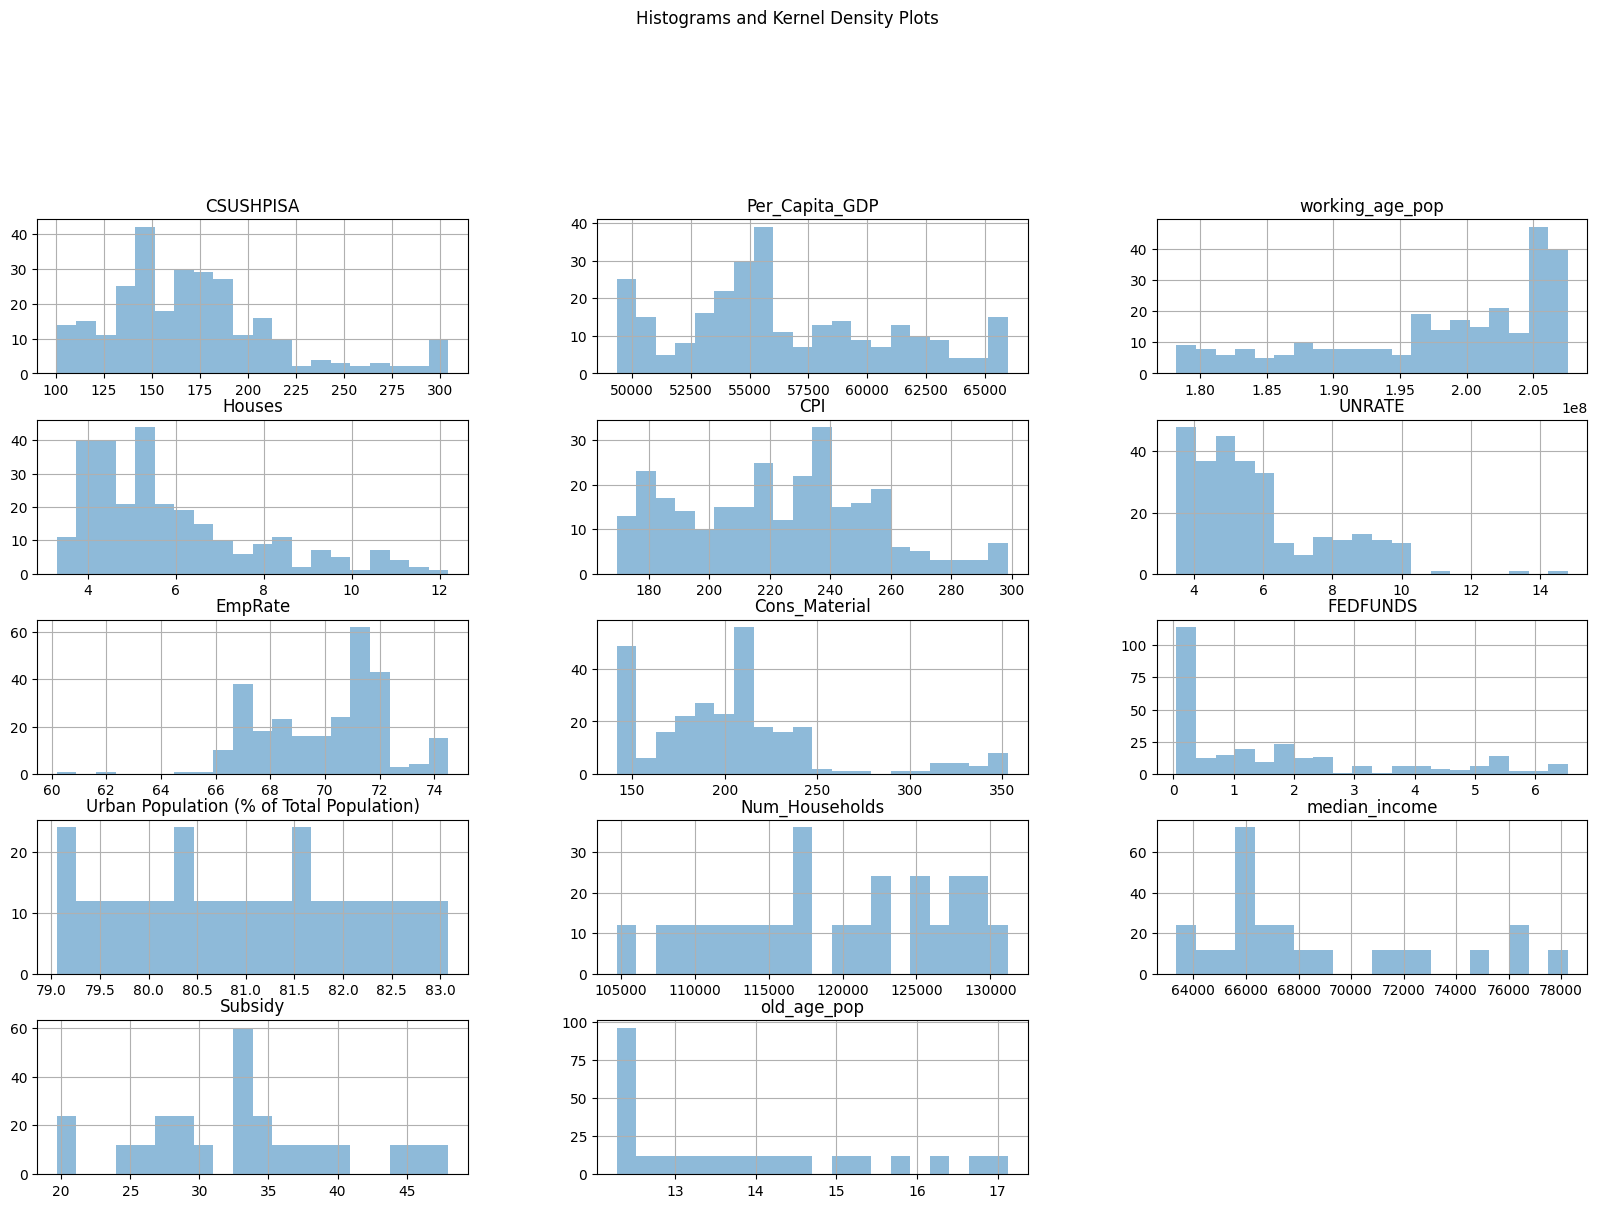

In [10]:
# Histograms and Kernel Density Plots
plt.figure(figsize=(20, 15))
df.hist(bins=20, alpha=0.5, layout=(6, 3), figsize=(20, 15))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

#### Extract features and target

In [11]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

**Plotting scatter plots of the CASE-SHILLER index vs features**

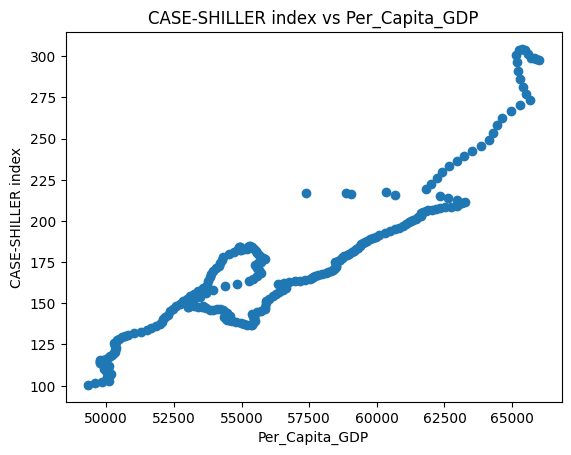

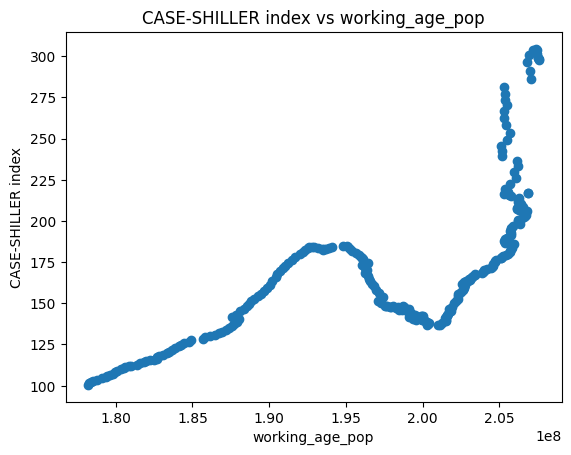

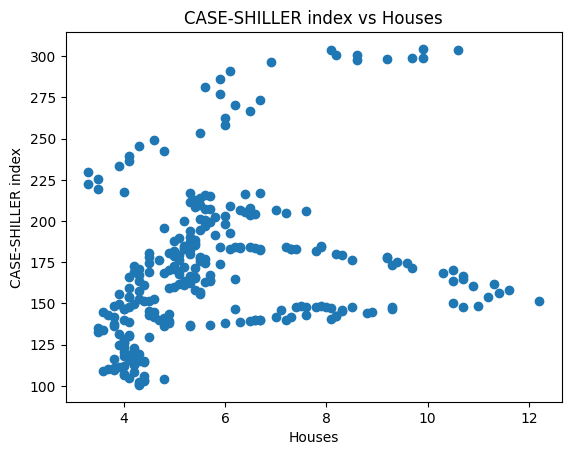

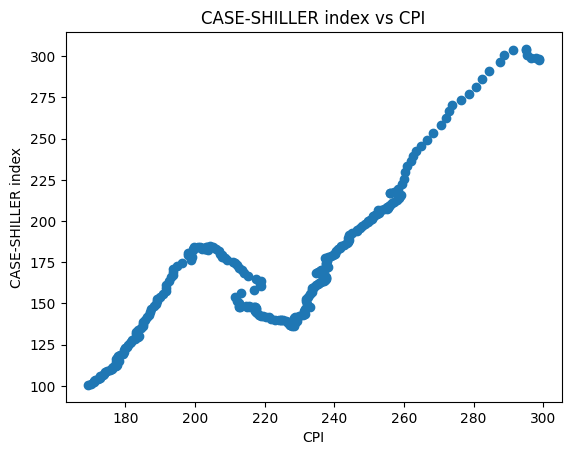

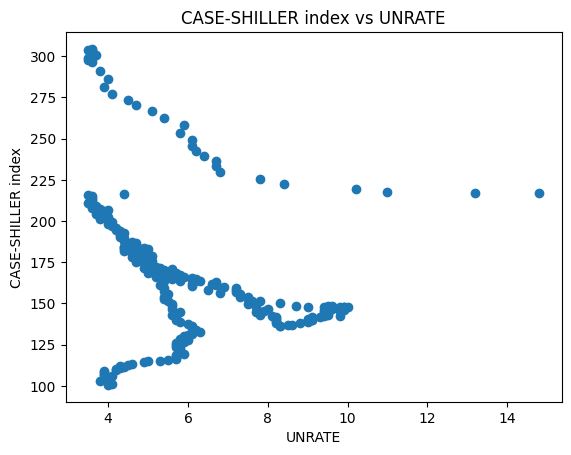

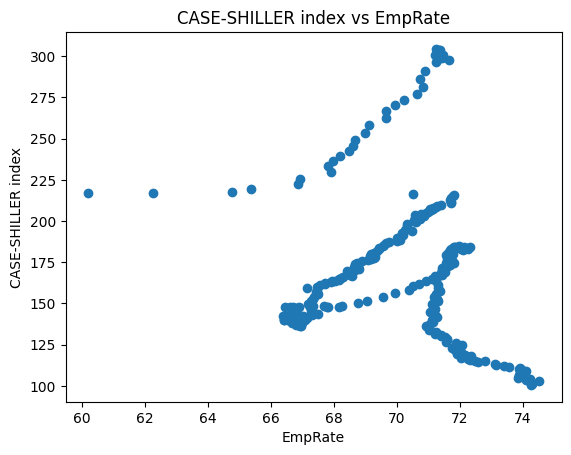

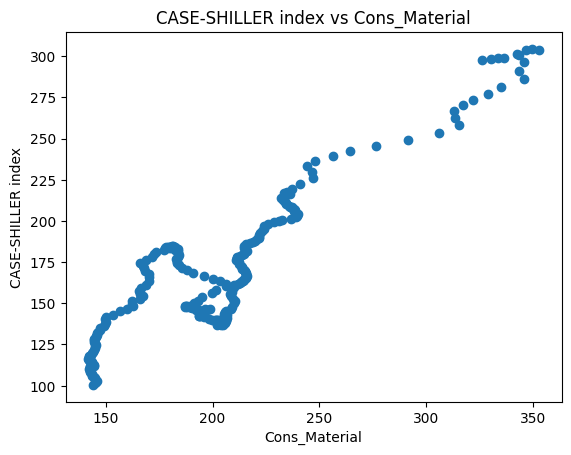

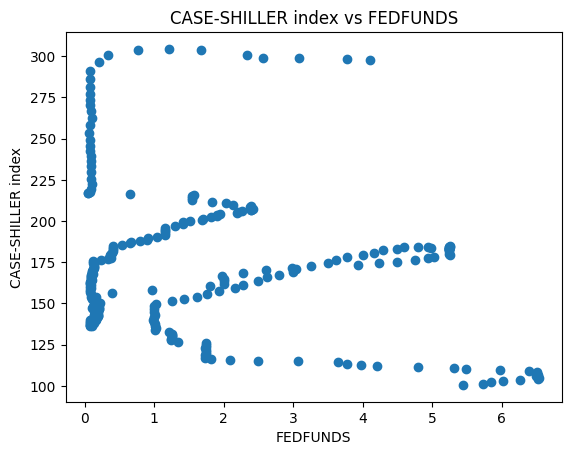

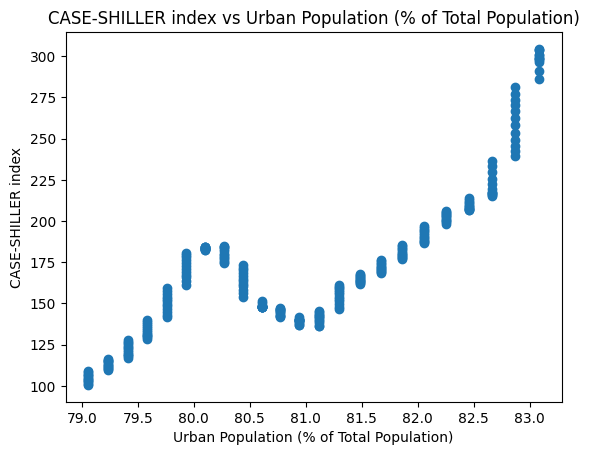

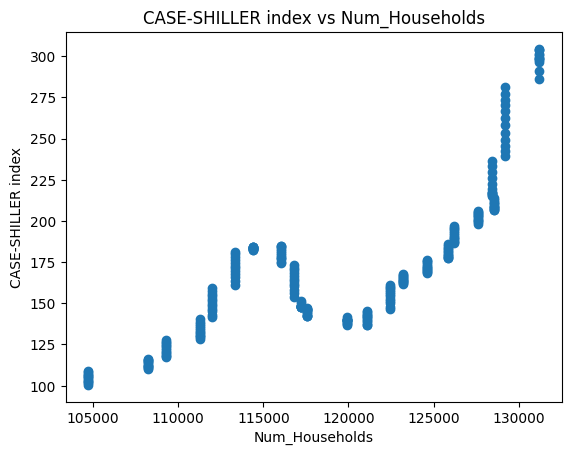

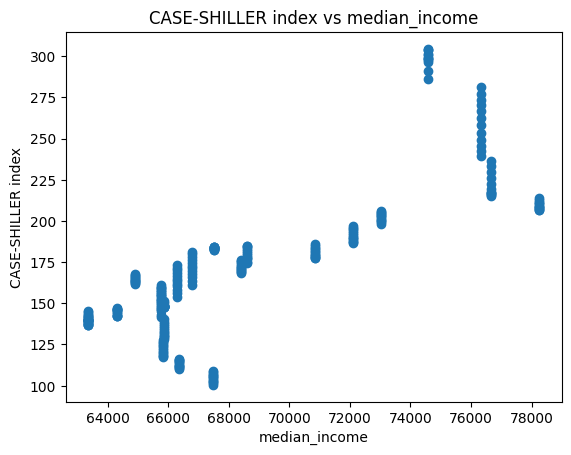

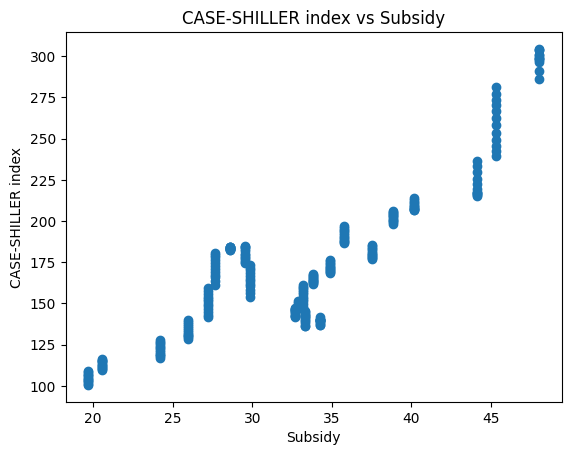

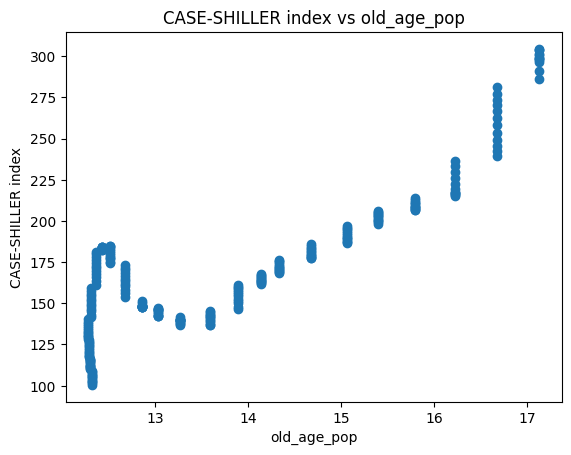

In [12]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

#### Calculate correlation coefficients

In [13]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
EmpRate                                     0.061427
FEDFUNDS                                    0.171300
Houses                                      0.274543
UNRATE                                      0.310572
working_age_pop                             0.707830
median_income                               0.793886
Num_Households                              0.802138
Urban Population (% of Total Population)    0.830503
old_age_pop                                 0.854763
CPI                                         0.858321
Subsidy                                     0.874579
Cons_Material                               0.914470
Per_Capita_GDP                              0.922492
dtype: float64


*Highest Correlation:*
* The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.922492. This feature shows a strong positive linear relationship with home prices.

*Other Strong Correlations:*
* 'Cons_Material' (0.914470), 'Subsidy' (0.874579), 'CPI' (0.858321), 'old_age_pop' (0.854763), 'Urban Population (% of Total Population)' (0.830503), 'Num_Households' (0.802138), and 'median_income' (0.793886) also have strong positive correlations.

*Moderate Correlations:*

* 'working_age_pop' (0.707830) has a moderate positive correlation.

*Lower Correlations:*
* 'UNRATE' (0.310572), 'Houses' (0.274543), 'FEDFUNDS' (0.171300), and 'EmpRate' (0.061427) have lower correlations.

### Data science models

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

We will drop the columns which has lower correlation with the target.

In [15]:
low_cols = ["Houses" ,"UNRATE", "EmpRate", "FEDFUNDS"]
df.drop(columns = low_cols, inplace = True)
X = df

In [16]:
X

,Per_Capita_GDP,working_age_pop,CPI,Cons_Material,Urban Population (% of Total Population),Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,
2000-01-01,49335.000000,178204700.0,169.300,144.100,79.057,104705.0,67470.0,19.690,12.317630
2000-02-01,49593.000000,178284800.0,170.000,144.700,79.057,104705.0,67470.0,19.690,12.317630
2000-03-01,49851.000000,178367900.0,171.000,145.400,79.057,104705.0,67470.0,19.690,12.317630
2000-04-01,50109.000000,178536800.0,170.900,145.600,79.057,104705.0,67470.0,19.690,12.317630
2000-05-01,50080.666667,178770300.0,171.200,144.900,79.057,104705.0,67470.0,19.690,12.317630
...,...,...,...,...,...,...,...,...,...
2022-08-01,65579.000000,207443000.0,295.209,342.753,83.084,131202.0,74580.0,48.021,17.128121
2022-09-01,65689.000000,207505000.0,296.341,336.464,83.084,131202.0,74580.0,48.021,17.128121
2022-10-01,65799.000000,207525000.0,297.863,333.796,83.084,131202.0,74580.0,48.021,17.128121


### Models building

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [18]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.


In [19]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 88.50625776904339
R-squared: 0.94387878498882
Coefficients:
Per_Capita_GDP: 42.70639697846981
working_age_pop: -0.9881811418043678
CPI: 2.5355655322264306
Cons_Material: 21.999250127175554
Urban Population (% of Total Population): -101.32468241661854
Num_Households: 32.51899127167282
median_income: 10.649656607514123
Subsidy: 34.89461483559114
old_age_pop: 2.441081660898208
Intercept: 173.17185909090813

Model: ElasticNet
Mean Squared Error: 200.79928088710224
R-squared: 0.8726745441417032
Coefficients:
Per_Capita_GDP: 8.356662534633335
working_age_pop: -0.0
CPI: 3.7594812748235102
Cons_Material: 10.036249794400337
Urban Population (% of Total Population): 1.1332679858155326
Num_Households: 0.6565379082104303
median_income: 8.148023754778256
Subsidy: 5.691705699053677
old_age_pop: 2.597527151608692
Intercept: 173.1718590909091

Model: Random Forest
Mean Squared Error: 2.161191883424987
R-squared: 0.998629602952069
Feature Importance Analysis

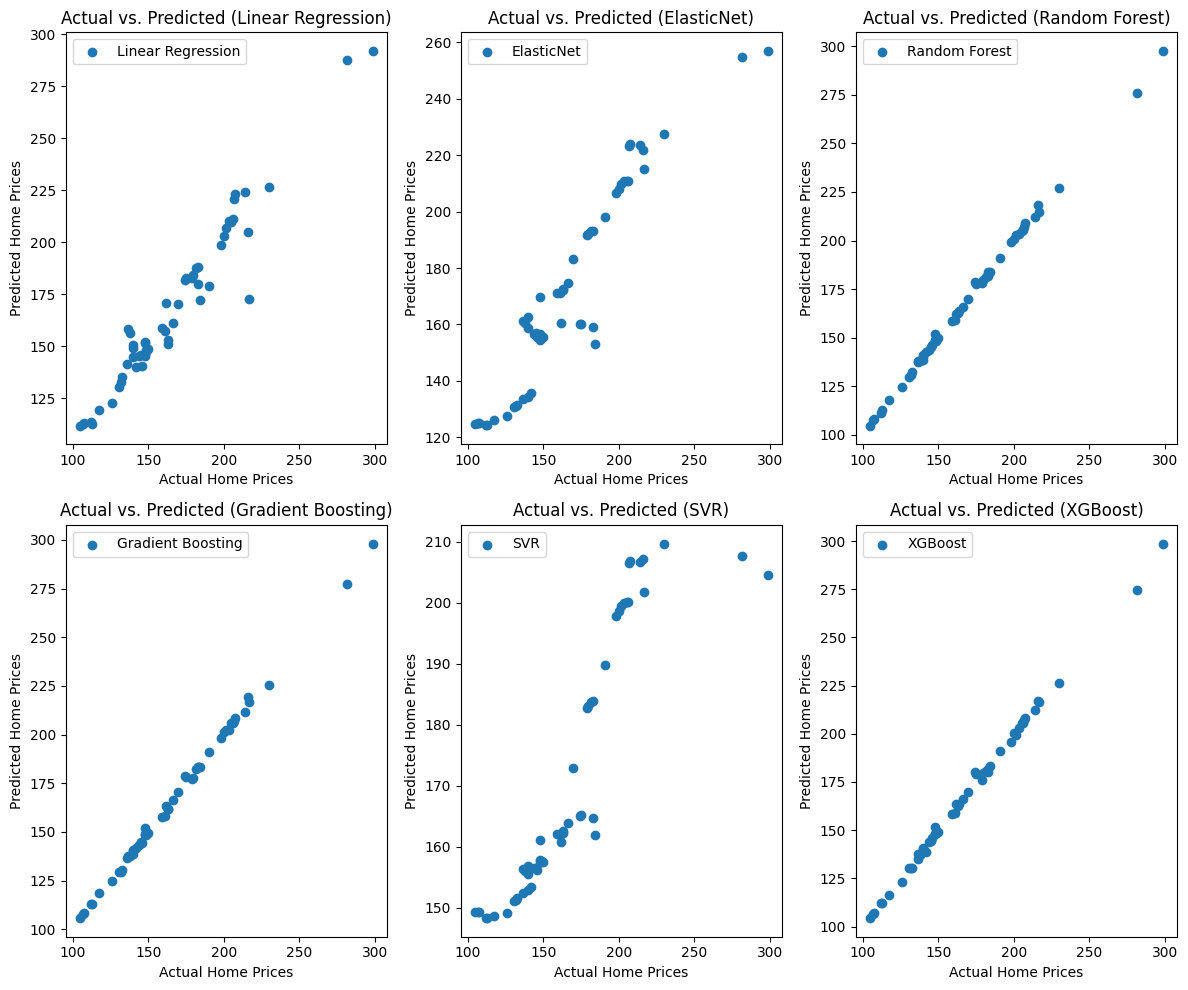


Best Model: RandomForestRegressor with MSE: 2.161191883424987


In [20]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

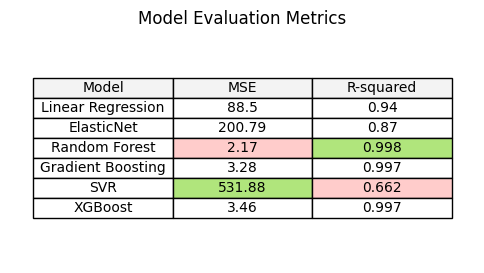

In [21]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [88.50, 200.79, 2.17, 3.28, 531.88, 3.46],
    'R-squared': [0.94, 0.87, 0.998, 0.997, 0.662, 0.997]
}

df1 = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df1.values, colLabels=df1.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df1.columns), colWidths=[0.25]*len(df1.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df1['MSE'])
max_mse_index = np.argmax(df1['MSE'])

for i in range(len(df1)):
    for j in range(len(df1.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df1.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df1['R-squared'])
max_r2_index = np.argmax(df1['R-squared'])

for i in range(len(df1)):
    for j in range(len(df1.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df1.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()


# **Decision:**

**Low MSE:** The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.


**High R-squared:** The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.


**Random Forest , Gradient Boosting and XGBoost** appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, these models provide insights into feature importance.


**Linear Regression** has higher MSE value, indicating potential limitations in predictive accuracy.

**ElasticNet and SVR** have considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

**Best model:** 
In summary, based on the provided metrics, **Random Forest** appear to be a **strong candidate** for the best model, with a low MSE and a high R-squared value.



**Feature Importance:** The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'Per Capita Income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential.


